#Submitted by:

1.   Yuval Luria 318390275
2.   Yoav Sabag 205382690
3.   Barel Hatuka 203765227



In [ ]:
import pandas as pd
from google.colab import files
import io
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn as sns
!pip install arch
from arch import arch_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import numpy as np


# Data Preperation

The file we have received for the project is XLS file so we had to convert it to csv for the simplisity of the file reading.
The file included utf-8 values which had to be eliminated pre-uploading the file to the notebook.

In [ ]:
df_experiment1 = pd.read_csv('/content/run1_1.csv')
df_experiment1 = df_experiment1.set_index('Time Stamp')
df_experiment1.index = pd.to_datetime(df_experiment1.index)
df_experiment1.drop(index=df_experiment1.index[0], axis=0, inplace=True)


In [ ]:
df_experiment1

,Unnamed: 1,1-pH_Dev2,Unnamed: 3,2-DO_Dev2,Unnamed: 5,Agitation_Dev2,Unnamed: 7,Air_Dev2,Unnamed: 9,CO2_Dev2,...,Unnamed: 15,Pump1_Dev2,Unnamed: 17,Pump2_Dev2,Unnamed: 19,Pump3_Dev2,Unnamed: 21,Temperature_Dev2,Unnamed: 23,Unnamed: 24
Time Stamp,,,,,,,,,,,,,,,,,,,,,
2023-01-23 18:54:00,NaN,6.11,NaN,42.01,NaN,303,NaN,100.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,28.00,NaN,NaN
2023-01-23 18:55:00,NaN,6.11,NaN,41.20,NaN,269,NaN,100.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,28.00,NaN,NaN
2023-01-23 18:56:00,NaN,6.11,NaN,38.67,NaN,243,NaN,100.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,28.00,NaN,NaN
2023-01-23 18:57:00,NaN,6.11,NaN,35.23,NaN,229,NaN,100.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,27.99,NaN,NaN
2023-01-23 18:58:00,NaN,6.11,NaN,31.22,NaN,227,NaN,100.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,28.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 08:34:00,NaN,7.58,NaN,88.05,NaN,300,NaN,100.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,14.58,NaN,NaN
2023-01-26 08:35:00,NaN,7.68,NaN,86.10,NaN,300,NaN,100.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,14.68,NaN,NaN
2023-01-26 08:36:00,NaN,7.73,NaN,85.04,NaN,301,NaN,100.0,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,14.79,NaN,NaN


**Dictionary:**

*   Time Stamp - indexes
*   2-DO_Dev2 (The target column) - non linear variable - we would like to find to corelated features
*   Agitation_Dev2 - Supportive material flow to the organizem
*   Air_Dev2 -Air flow to the system
*   GasFlow_Dev2 - A higher gaz flow as better to the organizm
*   O2_Dev2 - Oxigen measurement
*   Pump1_Dev2 - Food flow for the organizm
*   Pump2_Dev2 - The pump2 indication
*   Pump3_Dev2 - PH balancing
*   Temperature_Dev2 - Temp measurment




**Droping the unnecessary columns:**

*   1-pH_Dev2 - doesn't have any effect on the research mission
*   N2_Dev2 - All '0' values
*   CO2_Dev2 - italicized text




In [ ]:
df_experiment1=df_experiment1.drop('1-pH_Dev2', axis = 1)
df_experiment1=df_experiment1.drop('CO2_Dev2', axis = 1)
df_experiment1=df_experiment1.drop('N2_Dev2', axis = 1)
df_experiment1=df_experiment1.drop('Unnamed: 24', axis = 1)
df_experiment1

,Unnamed: 1,Unnamed: 3,2-DO_Dev2,Unnamed: 5,Agitation_Dev2,Unnamed: 7,Air_Dev2,Unnamed: 9,Unnamed: 11,GasFlow_Dev2,O2_Dev2,Unnamed: 15,Pump1_Dev2,Unnamed: 17,Pump2_Dev2,Unnamed: 19,Pump3_Dev2,Unnamed: 21,Temperature_Dev2,Unnamed: 23
Time Stamp,,,,,,,,,,,,,,,,,,,,
2023-01-23 18:54:00,NaN,NaN,42.01,NaN,303,NaN,100.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,28.00,NaN
2023-01-23 18:55:00,NaN,NaN,41.20,NaN,269,NaN,100.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,28.00,NaN
2023-01-23 18:56:00,NaN,NaN,38.67,NaN,243,NaN,100.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,28.00,NaN
2023-01-23 18:57:00,NaN,NaN,35.23,NaN,229,NaN,100.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,27.99,NaN
2023-01-23 18:58:00,NaN,NaN,31.22,NaN,227,NaN,100.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,28.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 08:34:00,NaN,NaN,88.05,NaN,300,NaN,100.0,NaN,NaN,1.5,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,14.58,NaN
2023-01-26 08:35:00,NaN,NaN,86.10,NaN,300,NaN,100.0,NaN,NaN,1.5,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,14.68,NaN
2023-01-26 08:36:00,NaN,NaN,85.04,NaN,301,NaN,100.0,NaN,NaN,1.5,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,14.79,NaN


In [ ]:
df_experiment1 = df_experiment1.dropna(axis =0, how = 'all')
df_experiment1 = df_experiment1.dropna(axis =1, how = 'all')
df_experiment1

,2-DO_Dev2,Agitation_Dev2,Air_Dev2,GasFlow_Dev2,O2_Dev2,Pump1_Dev2,Pump2_Dev2,Pump3_Dev2,Temperature_Dev2
Time Stamp,,,,,,,,,
2023-01-23 18:54:00,42.01,303,100.0,1.0,0.0,0.0,0.0,0.0,28.00
2023-01-23 18:55:00,41.20,269,100.0,1.0,0.0,0.0,0.0,0.0,28.00
2023-01-23 18:56:00,38.67,243,100.0,1.0,0.0,0.0,0.0,0.0,28.00
2023-01-23 18:57:00,35.23,229,100.0,1.0,0.0,0.0,0.0,0.0,27.99
2023-01-23 18:58:00,31.22,227,100.0,1.0,0.0,0.0,0.0,0.0,28.00
...,...,...,...,...,...,...,...,...,...
2023-01-26 08:34:00,88.05,300,100.0,1.5,0.0,0.0,0.0,0.0,14.58
2023-01-26 08:35:00,86.10,300,100.0,1.5,0.0,0.0,0.0,0.0,14.68
2023-01-26 08:36:00,85.04,301,100.0,1.5,0.0,0.0,0.0,0.0,14.79


In [ ]:
df_TIME=df_experiment1.index

**In order to use time series methods we have to define the time-stemp as the indexes of the dataset and save it as a variable**

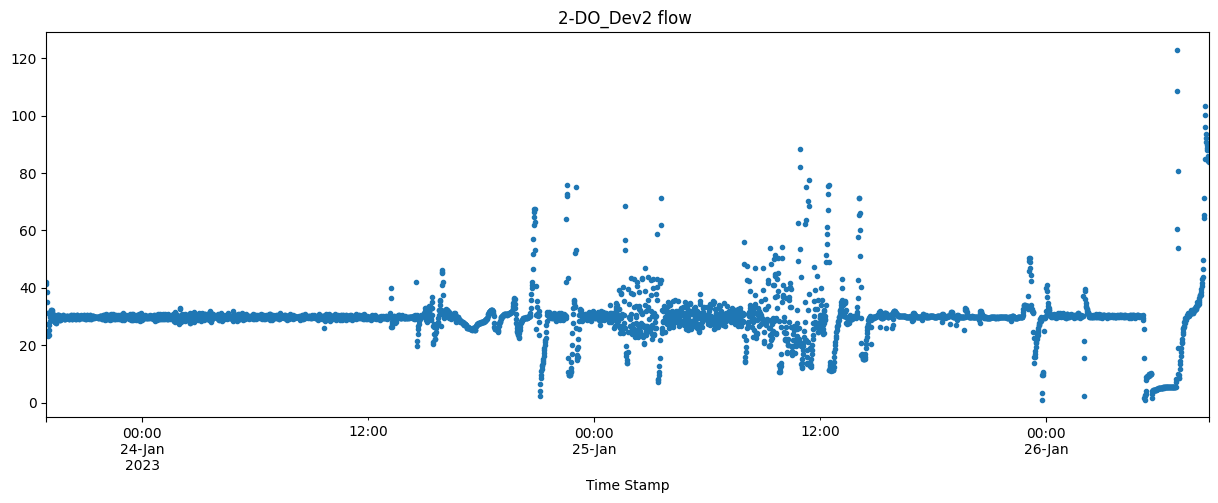

In [ ]:
df_experiment1['2-DO_Dev2'].plot(style='.',
        figsize=(15, 5),
        title='2-DO_Dev2 flow ')
plt.show()

From the figure we can visualise the oxigen flow to the system, we know that as more organizm present in the system, the oxigen flow increases

# **Processing**




## **Train/Test Split**

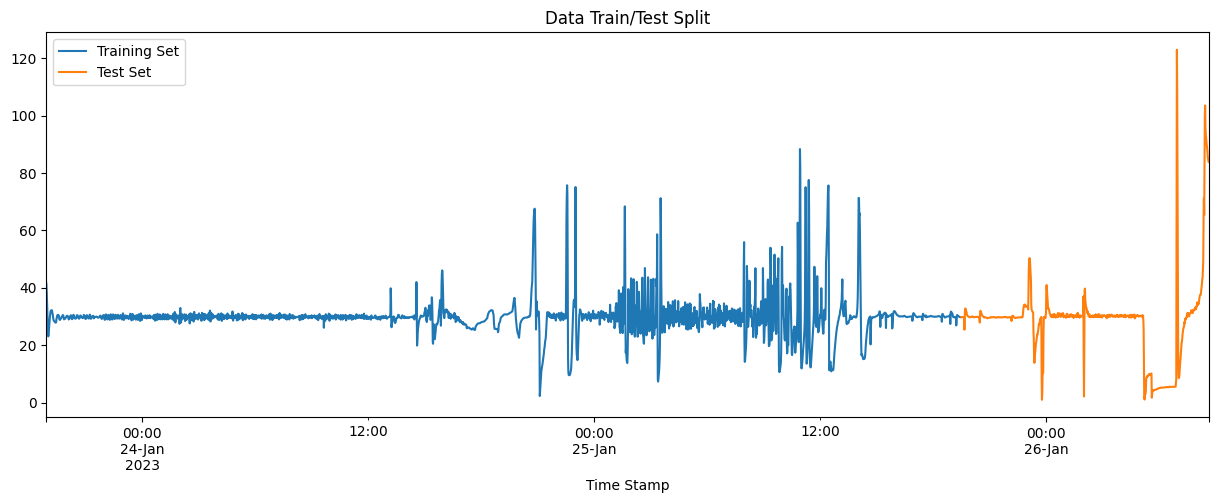

In [ ]:

train = df_experiment1['2-DO_Dev2'].loc[df_TIME < '2023-01-25 19:30:00']
test = df_experiment1['2-DO_Dev2'].loc[df_TIME >= '2023-01-25 19:30:00']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

From the figure we visualize the train-test split, the split is detemend by the date time -> '2023-01-25 19:30:00 in order to create a ratio of 80-20 train test respectively

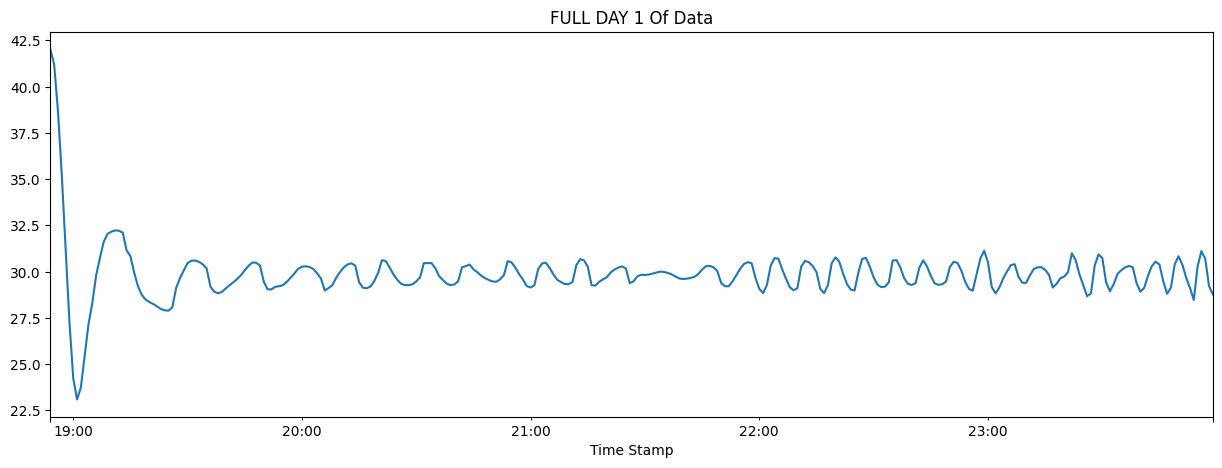

In [ ]:
df_experiment1['2-DO_Dev2'].loc[(df_TIME > '2023-01-23 00:00:00') & (df_TIME <= '2023-01-23 23:59:59')] \
    .plot(figsize=(15, 5), title='FULL DAY 1 Of Data')
plt.show()

From the figure above we get the visualisation of the first day, we see that the gratest variance is at noon, the smallest variance is at evening, and the exeptancy is around 30.

 ** now we  will  plot the target variable DO_DEV_2 over a full day of 24 hours in order to compare the 3 days of measurments**


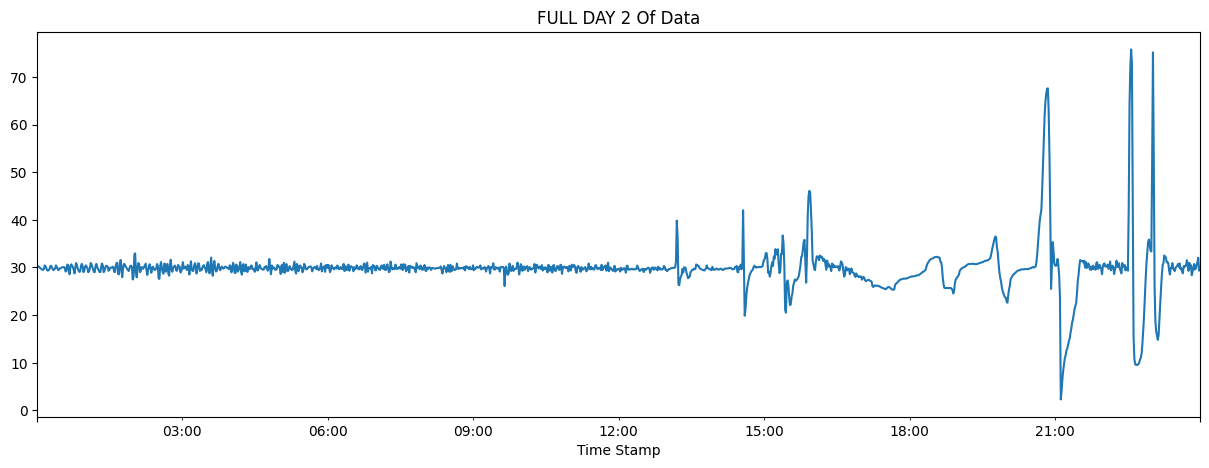

In [ ]:
df_experiment1['2-DO_Dev2'].loc[(df_TIME > '2023-01-24 00:00:00') & (df_TIME <= '2023-01-24 23:59:59')] \
    .plot(figsize=(15, 5), title='FULL DAY 2 Of Data')
plt.show()

From the 2nd day plot we see that the variance of most of the day is much smaller than at the first day, however during the evening, since 7 PM the varince increases significantly. in addition the expectancy is still around 30

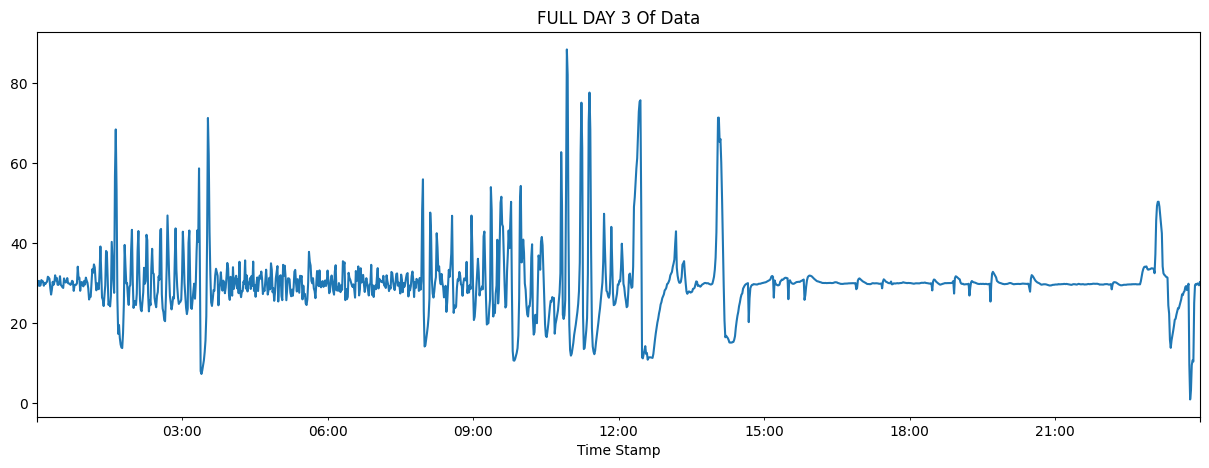

In [ ]:
df_experiment1['2-DO_Dev2'].loc[(df_TIME > '2023-01-25 00:00:00') & (df_TIME <= '2023-01-25 23:59:59')] \
    .plot(figsize=(15, 5), title='FULL DAY 3 Of Data')
plt.show()

As we see in the figure presents the 3rd day plot, the 1st and 3rd day are very similiar but the 2nd day plot behaves very diffrently.



## **FEATURE CREATION**

In the following section we simplified the time stamp as minutes, hours , days of weeks , months and year in order to detect specific time with any anomaly

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.day
    df['minutes']=df.index.minute
    return df

df_experiment1 = create_features(df_experiment1)
df_experiment1

,2-DO_Dev2,Agitation_Dev2,Air_Dev2,GasFlow_Dev2,O2_Dev2,Pump1_Dev2,Pump2_Dev2,Pump3_Dev2,Temperature_Dev2,hour,dayofweek,month,year,dayofyear,minutes
Time Stamp,,,,,,,,,,,,,,,
2023-01-23 18:54:00,42.01,303,100.0,1.0,0.0,0.0,0.0,0.0,28.00,18,0,1,2023,23,54
2023-01-23 18:55:00,41.20,269,100.0,1.0,0.0,0.0,0.0,0.0,28.00,18,0,1,2023,23,55
2023-01-23 18:56:00,38.67,243,100.0,1.0,0.0,0.0,0.0,0.0,28.00,18,0,1,2023,23,56
2023-01-23 18:57:00,35.23,229,100.0,1.0,0.0,0.0,0.0,0.0,27.99,18,0,1,2023,23,57
2023-01-23 18:58:00,31.22,227,100.0,1.0,0.0,0.0,0.0,0.0,28.00,18,0,1,2023,23,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 08:34:00,88.05,300,100.0,1.5,0.0,0.0,0.0,0.0,14.58,8,3,1,2023,26,34
2023-01-26 08:35:00,86.10,300,100.0,1.5,0.0,0.0,0.0,0.0,14.68,8,3,1,2023,26,35
2023-01-26 08:36:00,85.04,301,100.0,1.5,0.0,0.0,0.0,0.0,14.79,8,3,1,2023,26,36


At the table above we see the dataframe with the new features of time intervals

# Visualization

By ploting the target during the diffrent time inntervals, we look for studying the behavior of the target by the diffrent time intervals

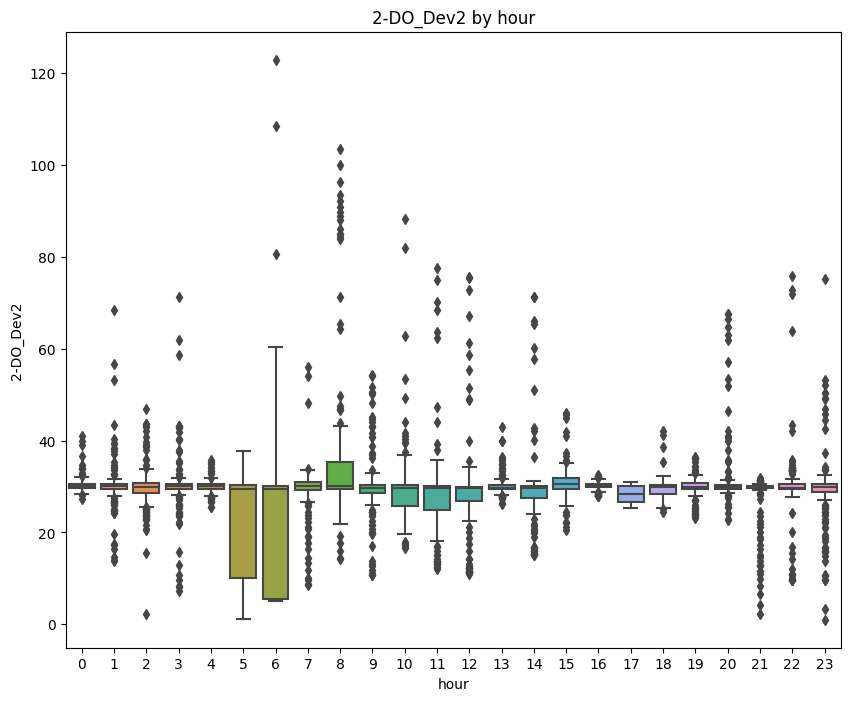

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_experiment1, x='hour', y='2-DO_Dev2')
ax.set_title('2-DO_Dev2 by hour')
plt.show()

At the figure above we present the do_dev_2 plot per hour


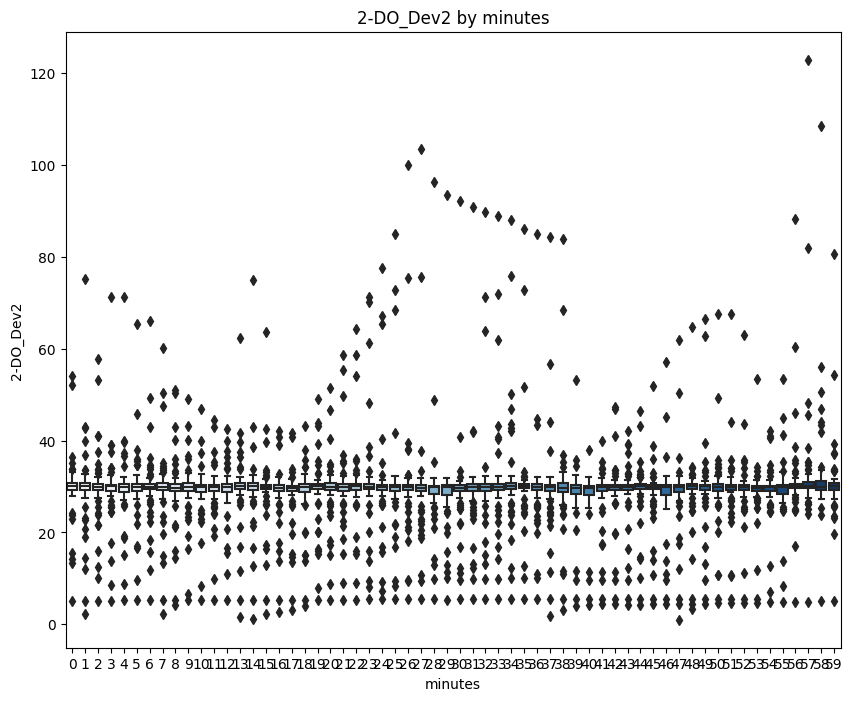

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_experiment1, x='minutes', y='2-DO_Dev2', palette='Blues')
ax.set_title('2-DO_Dev2 by minutes')
plt.show()

At the figure above we present the do_dev_2 plot per minuntes


#Time Series Model Implementation


## **Arch**

Autoregressive conditional heteroskedasticity is a statistical model used to analize and descibe the variance as a function of actual sizes of the previous time periodes.
By training the Arch model on the dataframe we will forcast the variance of the target and compare it.

In [ ]:
model = arch_model(train, mean='Zero', vol='ARCH', p=15)

In [ ]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 14012.573758102275
Iteration:      2,   Func. Count:     35,   Neg. LLF: 14040.104773029865
Iteration:      3,   Func. Count:     56,   Neg. LLF: 14012.717665793285
Iteration:      4,   Func. Count:     74,   Neg. LLF: 14012.040764927266
Iteration:      5,   Func. Count:     91,   Neg. LLF: 14012.345910829386
Iteration:      6,   Func. Count:    109,   Neg. LLF: 14012.620032747827
Iteration:      7,   Func. Count:    127,   Neg. LLF: 14012.041354409484
Iteration:      8,   Func. Count:    145,   Neg. LLF: 14012.139647546905
Iteration:      9,   Func. Count:    163,   Neg. LLF: 14012.015325332595
Iteration:     10,   Func. Count:    180,   Neg. LLF: 14012.006454462331
Iteration:     11,   Func. Count:    197,   Neg. LLF: 14012.041301466252
Iteration:     12,   Func. Count:    215,   Neg. LLF: 14012.066583680738
Iteration:     13,   Func. Count:    233,   Neg. LLF: 14011.942929383142
Iteration:     14,   Func. Count:    250,   Neg. LL

/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


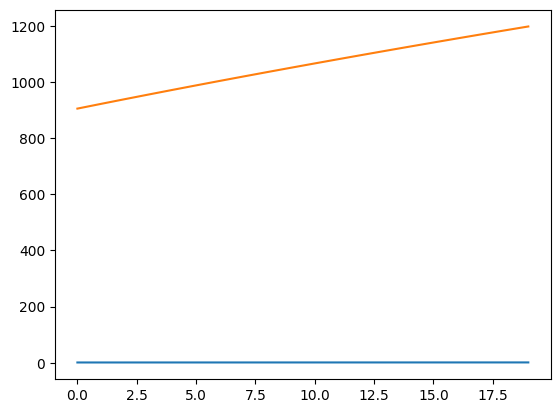

In [ ]:
yhat = model_fit.forecast(horizon=20)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
plt.plot(var[-20:])
# plot forecast variance
plt.plot(yhat.variance.values[-1, :])
plt.show()

From the graph presented above we see the variance comparison beween the original and forcasted variance values compared.

## Sarima

Seasonal AutoRegressive Integrated Moving Average is a time series model that allow for diffrencing the data by seasonal friquency, this model takes into account exogenous variables, in other word it uses external data to forecast the target-features values

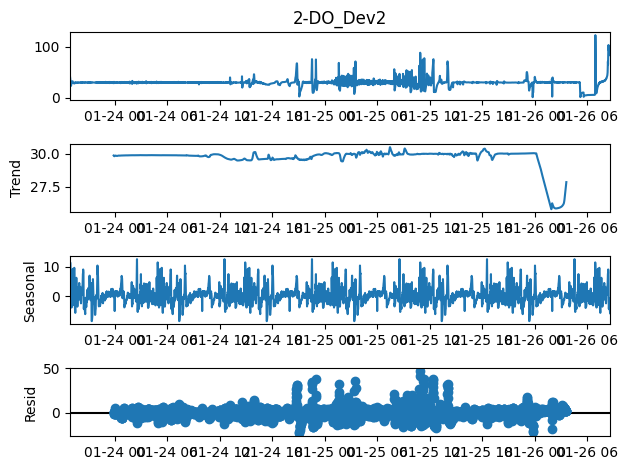

In [ ]:
decomposition = seasonal_decompose(
df_experiment1['2-DO_Dev2'], model='additive', period = 600)
decomposition.plot()
plt.show()

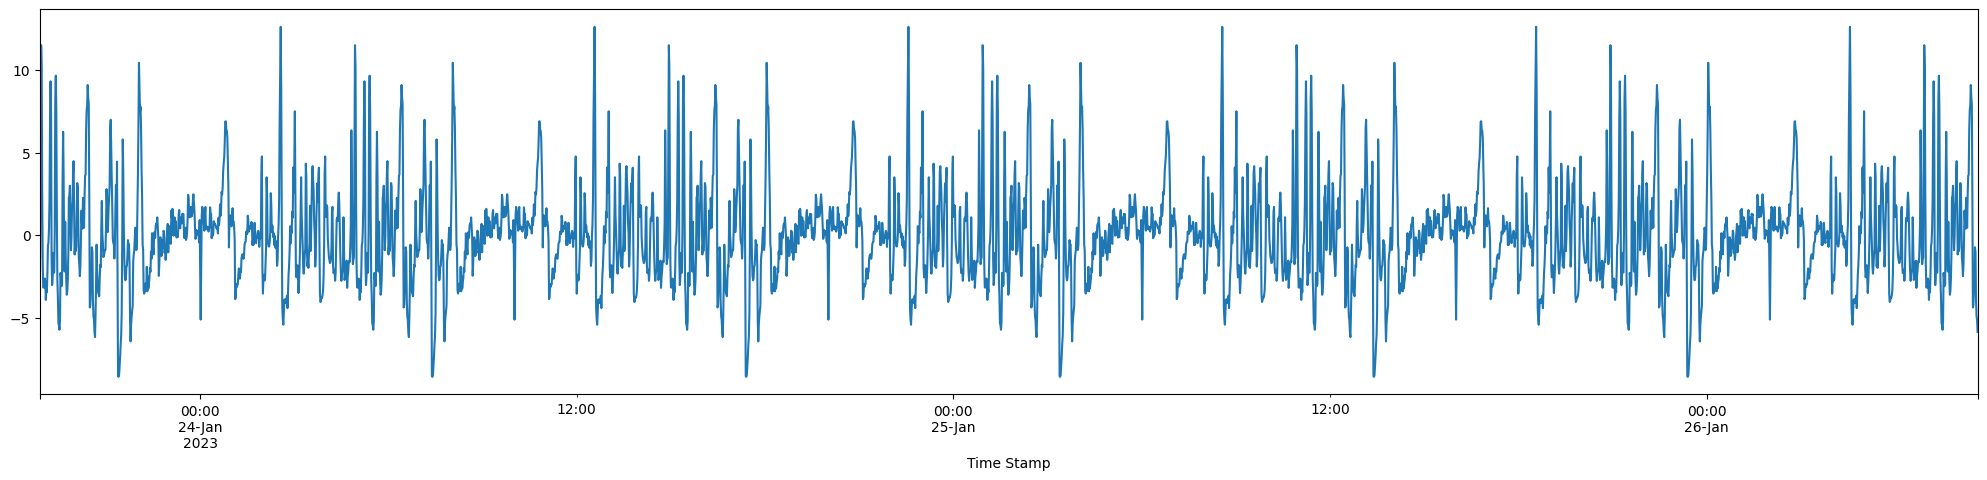

In [ ]:
fig = plt.figure()
fig.set_size_inches(25,5)
decomposition.seasonal.plot()
plt.show()

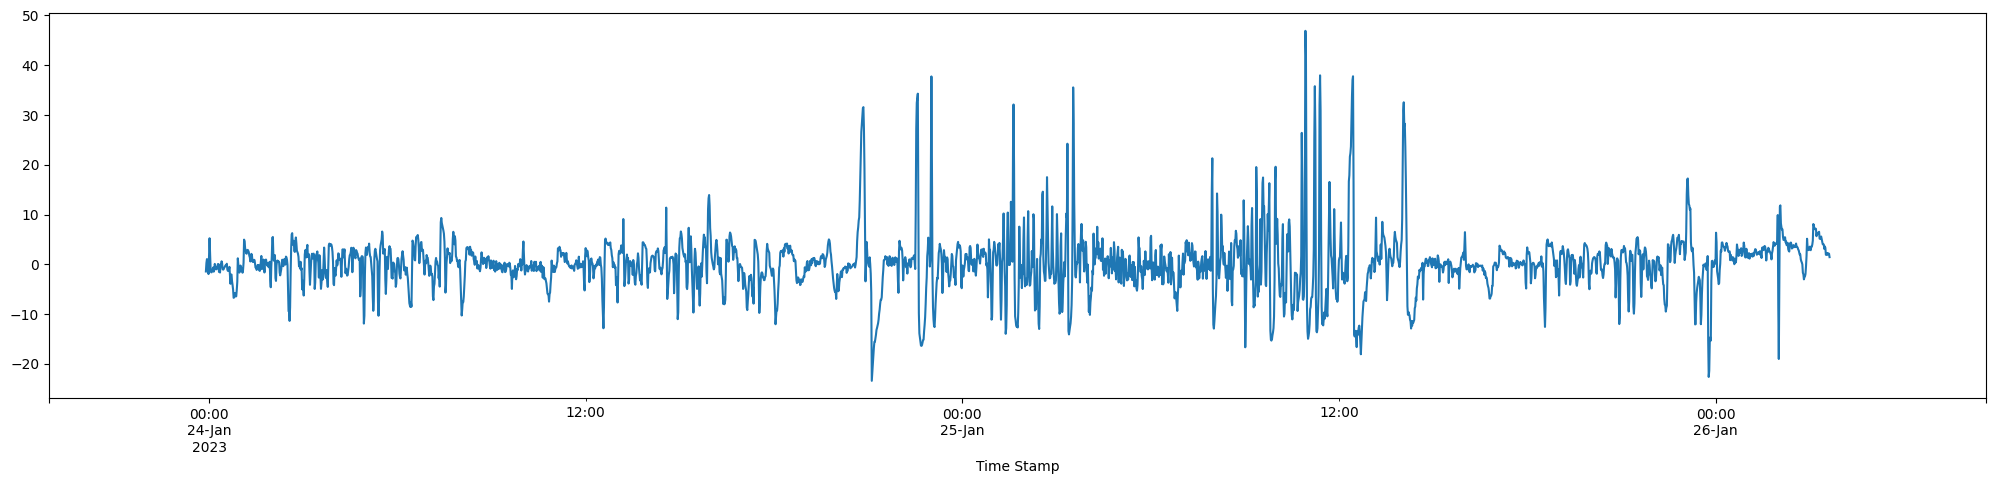

In [ ]:
fig = plt.figure()
fig.set_size_inches(25,5)
decomposition.resid.plot()
plt.show()

The 4 graphs above + plots of zoomed in presentes the seasonal decompose of the target variable:

1.   The original plot - that we already know
2.   The trend of the taget - constant 30 with a sharp decrease to 25 at the last day
3.   The seasonal component - 72(hours)/6(picks) = 12 hours seasonality
4.   The residual componnent - white noise with 0-expectency and changing variance









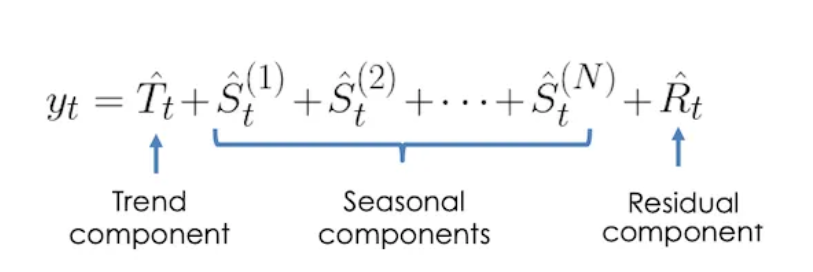

In [ ]:
train=train.to_frame()
test=test.to_frame()


train.set_axis([ '2-DO_Dev2'],
                    axis=1,inplace=True)
test.set_axis([ '2-DO_Dev2'],
                    axis=1,inplace=True)


<ipython-input-219-f5388e4ba456>:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  train.set_axis([ '2-DO_Dev2'],
<ipython-input-219-f5388e4ba456>:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  test.set_axis([ '2-DO_Dev2'],


In [ ]:
train = df_experiment1.loc[df_TIME < '2023-01-25 19:30:00']
test = df_experiment1.loc[df_TIME >= '2023-01-25 19:30:00']


In [ ]:
model = SARIMAX(
train['2-DO_Dev2'], order= (1, 1, 1), seasonal_order=(1, 1, 1, 12))

result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast = result.get_forecast(steps=len(test['2-DO_Dev2']))
pred_ci = forecast.predicted_mean

mse = mean_squared_error(test['2-DO_Dev2'], pred_ci)
rmse = np.sqrt(mse)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  191.40901392337693
Root Mean Squared Error:  13.835064651940623


From the SARIMA prediction we recived a large MSE of 191.4 , we conclude that either the SARIMA model is not an apropriate model for this data, or we had to a diffrent preproccessing is needed for this model

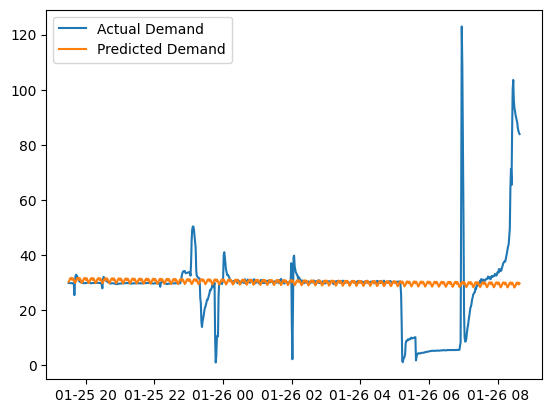

In [ ]:
plt.plot(test['2-DO_Dev2'], label='Actual Demand')
plt.plot(pred_ci, label='Predicted Demand')
plt.legend()
plt.show()

The graph above presents the SARIMA results, we see that the model is fit to the mean of the actual demand but is not adjusted to the anomalies

In [ ]:
pred_ci

2023-01-25 19:30:00    30.256803
2023-01-25 19:31:00    30.564158
2023-01-25 19:32:00    31.241302
2023-01-25 19:33:00    31.547298
2023-01-25 19:34:00    31.694316
                         ...    
2023-01-26 08:34:00    30.018985
2023-01-26 08:35:00    29.634809
2023-01-26 08:36:00    29.292333
2023-01-26 08:37:00    29.937963
2023-01-26 08:38:00    29.713154
Freq: T, Name: predicted_mean, Length: 789, dtype: float64

In [ ]:
corr = df_experiment1.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-225-b343d466f491>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_experiment1.corr()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,2-DO_Dev2,Air_Dev2,GasFlow_Dev2,O2_Dev2,Pump1_Dev2,Pump2_Dev2,Pump3_Dev2,Temperature_Dev2,hour,dayofweek,month,year,dayofyear,minutes
2-DO_Dev2,1.000000,0.202150,0.078112,-0.202308,0.017107,0.015368,0.051466,0.099418,0.022281,-0.052975,nan,nan,-0.052975,0.012066
Air_Dev2,0.202150,1.000000,0.096438,-0.999891,0.007475,0.021014,0.000984,0.585055,0.093012,-0.775634,nan,nan,-0.775634,-0.020291
GasFlow_Dev2,0.078112,0.096438,1.000000,-0.096323,-0.003086,0.004705,0.065458,0.227902,-0.076688,0.043696,nan,nan,0.043696,-0.009552
O2_Dev2,-0.202308,-0.999891,-0.096323,1.000000,-0.007458,-0.021023,-0.000958,-0.584788,-0.092755,0.775698,nan,nan,0.775698,0.020685
Pump1_Dev2,0.017107,0.007475,-0.003086,-0.007458,1.000000,-0.000229,0.002445,0.030727,0.031042,-0.018407,nan,nan,-0.018407,0.019692
Pump2_Dev2,0.015368,0.021014,0.004705,-0.021023,-0.000229,1.000000,-0.006993,0.010110,0.029446,-0.016426,nan,nan,-0.016426,0.020218
Pump3_Dev2,0.051466,0.000984,0.065458,-0.000958,0.002445,-0.006993,1.000000,0.088480,0.011904,0.019981,nan,nan,0.019981,-0.028459
Temperature_Dev2,0.099418,0.585055,0.227902,-0.584788,0.030727,0.010110,0.088480,1.000000,0.318052,-0.685775,nan,nan,-0.685775,0.006037
hour,0.022281,0.093012,-0.076688,-0.092755,0.031042,0.029446,0.011904,0.318052,1.000000,-0.452739,nan,nan,-0.452739,0.005128
dayofweek,-0.052975,-0.775634,0.043696,0.775698,-0.018407,-0.016426,0.019981,-0.685775,-0.452739,1.000000,nan,nan,1.000000,-0.015707


Form the correlation matrix presented, we see a low correlation between the features and the target, this explains the high MSE of both ARCH and SARIMA models. this might be because of the variable diffrent ranges of values, therefore we will normelize the dataframe.

In [ ]:
df_experiment1.dtypes

2-DO_Dev2           float64
Agitation_Dev2       object
Air_Dev2            float64
GasFlow_Dev2        float64
O2_Dev2             float64
Pump1_Dev2          float64
Pump2_Dev2          float64
Pump3_Dev2          float64
Temperature_Dev2    float64
hour                  int64
dayofweek             int64
month                 int64
year                  int64
dayofyear             int64
minutes               int64
dtype: object

In order to normalize the data, we need to replace the "object" type to numerical

In [ ]:
df_experiment1['Agitation_Dev2'] = df_experiment1['Agitation_Dev2'].str.replace(',','').astype(float)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df_experiment1)

print(normalized_data)

[[0.33636662 0.103      1.         ... 0.         0.         0.91525424]
 [0.32972618 0.069      1.         ... 0.         0.         0.93220339]
 [0.30898508 0.043      1.         ... 0.         0.         0.94915254]
 ...
 [0.68912937 0.101      1.         ... 0.         1.         0.61016949]
 [0.68371864 0.1        1.         ... 0.         1.         0.62711864]
 [0.67986555 0.101      1.         ... 0.         1.         0.6440678 ]]


In [ ]:
normalized_df = pd.DataFrame(normalized_data, columns=df_experiment1.columns)

print(normalized_df)


      2-DO_Dev2  Agitation_Dev2  Air_Dev2  GasFlow_Dev2  O2_Dev2  Pump1_Dev2  \
0      0.336367           0.103       1.0      0.220339      0.0         0.0   
1      0.329726           0.069       1.0      0.220339      0.0         0.0   
2      0.308985           0.043       1.0      0.220339      0.0         0.0   
3      0.280784           0.029       1.0      0.220339      0.0         0.0   
4      0.247909           0.027       1.0      0.220339      0.0         0.0   
...         ...             ...       ...           ...      ...         ...   
3700   0.713806           0.100       1.0      0.644068      0.0         0.0   
3701   0.697819           0.100       1.0      0.644068      0.0         0.0   
3702   0.689129           0.101       1.0      0.644068      0.0         0.0   
3703   0.683719           0.100       1.0      0.644068      0.0         0.0   
3704   0.679866           0.101       1.0      0.644068      0.0         0.0   

      Pump2_Dev2  Pump3_Dev2  Temperatu

In [ ]:
normalized_df.index=df_TIME

In [ ]:
normalized_df

,2-DO_Dev2,Agitation_Dev2,Air_Dev2,GasFlow_Dev2,O2_Dev2,Pump1_Dev2,Pump2_Dev2,Pump3_Dev2,Temperature_Dev2,hour,dayofweek,month,year,dayofyear,minutes
Time Stamp,,,,,,,,,,,,,,,
2023-01-23 18:54:00,0.336367,0.103,1.0,0.220339,0.0,0.0,0.0,0.0,0.994634,0.782609,0.0,0.0,0.0,0.0,0.915254
2023-01-23 18:55:00,0.329726,0.069,1.0,0.220339,0.0,0.0,0.0,0.0,0.994634,0.782609,0.0,0.0,0.0,0.0,0.932203
2023-01-23 18:56:00,0.308985,0.043,1.0,0.220339,0.0,0.0,0.0,0.0,0.994634,0.782609,0.0,0.0,0.0,0.0,0.949153
2023-01-23 18:57:00,0.280784,0.029,1.0,0.220339,0.0,0.0,0.0,0.0,0.993964,0.782609,0.0,0.0,0.0,0.0,0.966102
2023-01-23 18:58:00,0.247909,0.027,1.0,0.220339,0.0,0.0,0.0,0.0,0.994634,0.782609,0.0,0.0,0.0,0.0,0.983051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 08:34:00,0.713806,0.100,1.0,0.644068,0.0,0.0,0.0,0.0,0.094567,0.347826,1.0,0.0,0.0,1.0,0.576271
2023-01-26 08:35:00,0.697819,0.100,1.0,0.644068,0.0,0.0,0.0,0.0,0.101274,0.347826,1.0,0.0,0.0,1.0,0.593220
2023-01-26 08:36:00,0.689129,0.101,1.0,0.644068,0.0,0.0,0.0,0.0,0.108652,0.347826,1.0,0.0,0.0,1.0,0.610169


In [ ]:
corr = normalized_df.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,2-DO_Dev2,Agitation_Dev2,Air_Dev2,GasFlow_Dev2,O2_Dev2,Pump1_Dev2,Pump2_Dev2,Pump3_Dev2,Temperature_Dev2,hour,dayofweek,month,year,dayofyear,minutes
2-DO_Dev2,1.000000,0.055643,0.202150,0.078112,-0.202308,0.017107,0.015368,0.051466,0.099418,0.022281,-0.052975,nan,nan,-0.052975,0.012066
Agitation_Dev2,0.055643,1.000000,-0.241076,0.542515,0.241591,0.020869,0.012817,0.153649,0.358419,0.183352,0.297625,nan,nan,0.297625,0.013602
Air_Dev2,0.202150,-0.241076,1.000000,0.096438,-0.999891,0.007475,0.021014,0.000984,0.585055,0.093012,-0.775634,nan,nan,-0.775634,-0.020291
GasFlow_Dev2,0.078112,0.542515,0.096438,1.000000,-0.096323,-0.003086,0.004705,0.065458,0.227902,-0.076688,0.043696,nan,nan,0.043696,-0.009552
O2_Dev2,-0.202308,0.241591,-0.999891,-0.096323,1.000000,-0.007458,-0.021023,-0.000958,-0.584788,-0.092755,0.775698,nan,nan,0.775698,0.020685
Pump1_Dev2,0.017107,0.020869,0.007475,-0.003086,-0.007458,1.000000,-0.000229,0.002445,0.030727,0.031042,-0.018407,nan,nan,-0.018407,0.019692
Pump2_Dev2,0.015368,0.012817,0.021014,0.004705,-0.021023,-0.000229,1.000000,-0.006993,0.010110,0.029446,-0.016426,nan,nan,-0.016426,0.020218
Pump3_Dev2,0.051466,0.153649,0.000984,0.065458,-0.000958,0.002445,-0.006993,1.000000,0.088480,0.011904,0.019981,nan,nan,0.019981,-0.028459
Temperature_Dev2,0.099418,0.358419,0.585055,0.227902,-0.584788,0.030727,0.010110,0.088480,1.000000,0.318052,-0.685775,nan,nan,-0.685775,0.006037
hour,0.022281,0.183352,0.093012,-0.076688,-0.092755,0.031042,0.029446,0.011904,0.318052,1.000000,-0.452739,nan,nan,-0.452739,0.005128


The matrix above shows the correlation between all normalized features, form the new correlation matrix we conclude new best corelative features to the target.

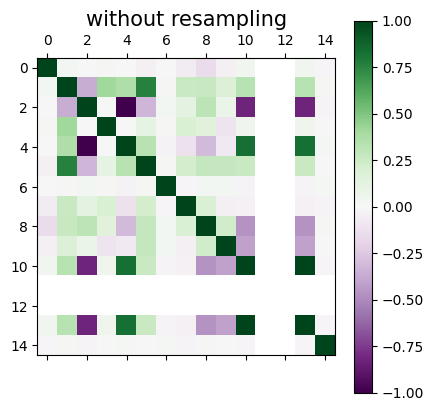

In [ ]:
plt.matshow(normalized_df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

In [ ]:
max(df_experiment1['2-DO_Dev2'])

122.96

<ipython-input-235-d77285de67ba>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(list(df_experiment1.columns)), 3, i)
<ipython-input-235-d77285de67ba>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='2-DO_Dev2', palette='Blues', data=df_experiment1)
<ipython-input-235-d77285de67ba>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(list(df_experiment1.columns)), 3, i)
<ipython-input-235-d77285de67ba>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='2-DO_Dev2', palette='Blues', data=df_experiment1)
<ipython-input-235-d77285de67ba>:7: UserWarning: Ignoring `palette` because no `hue`

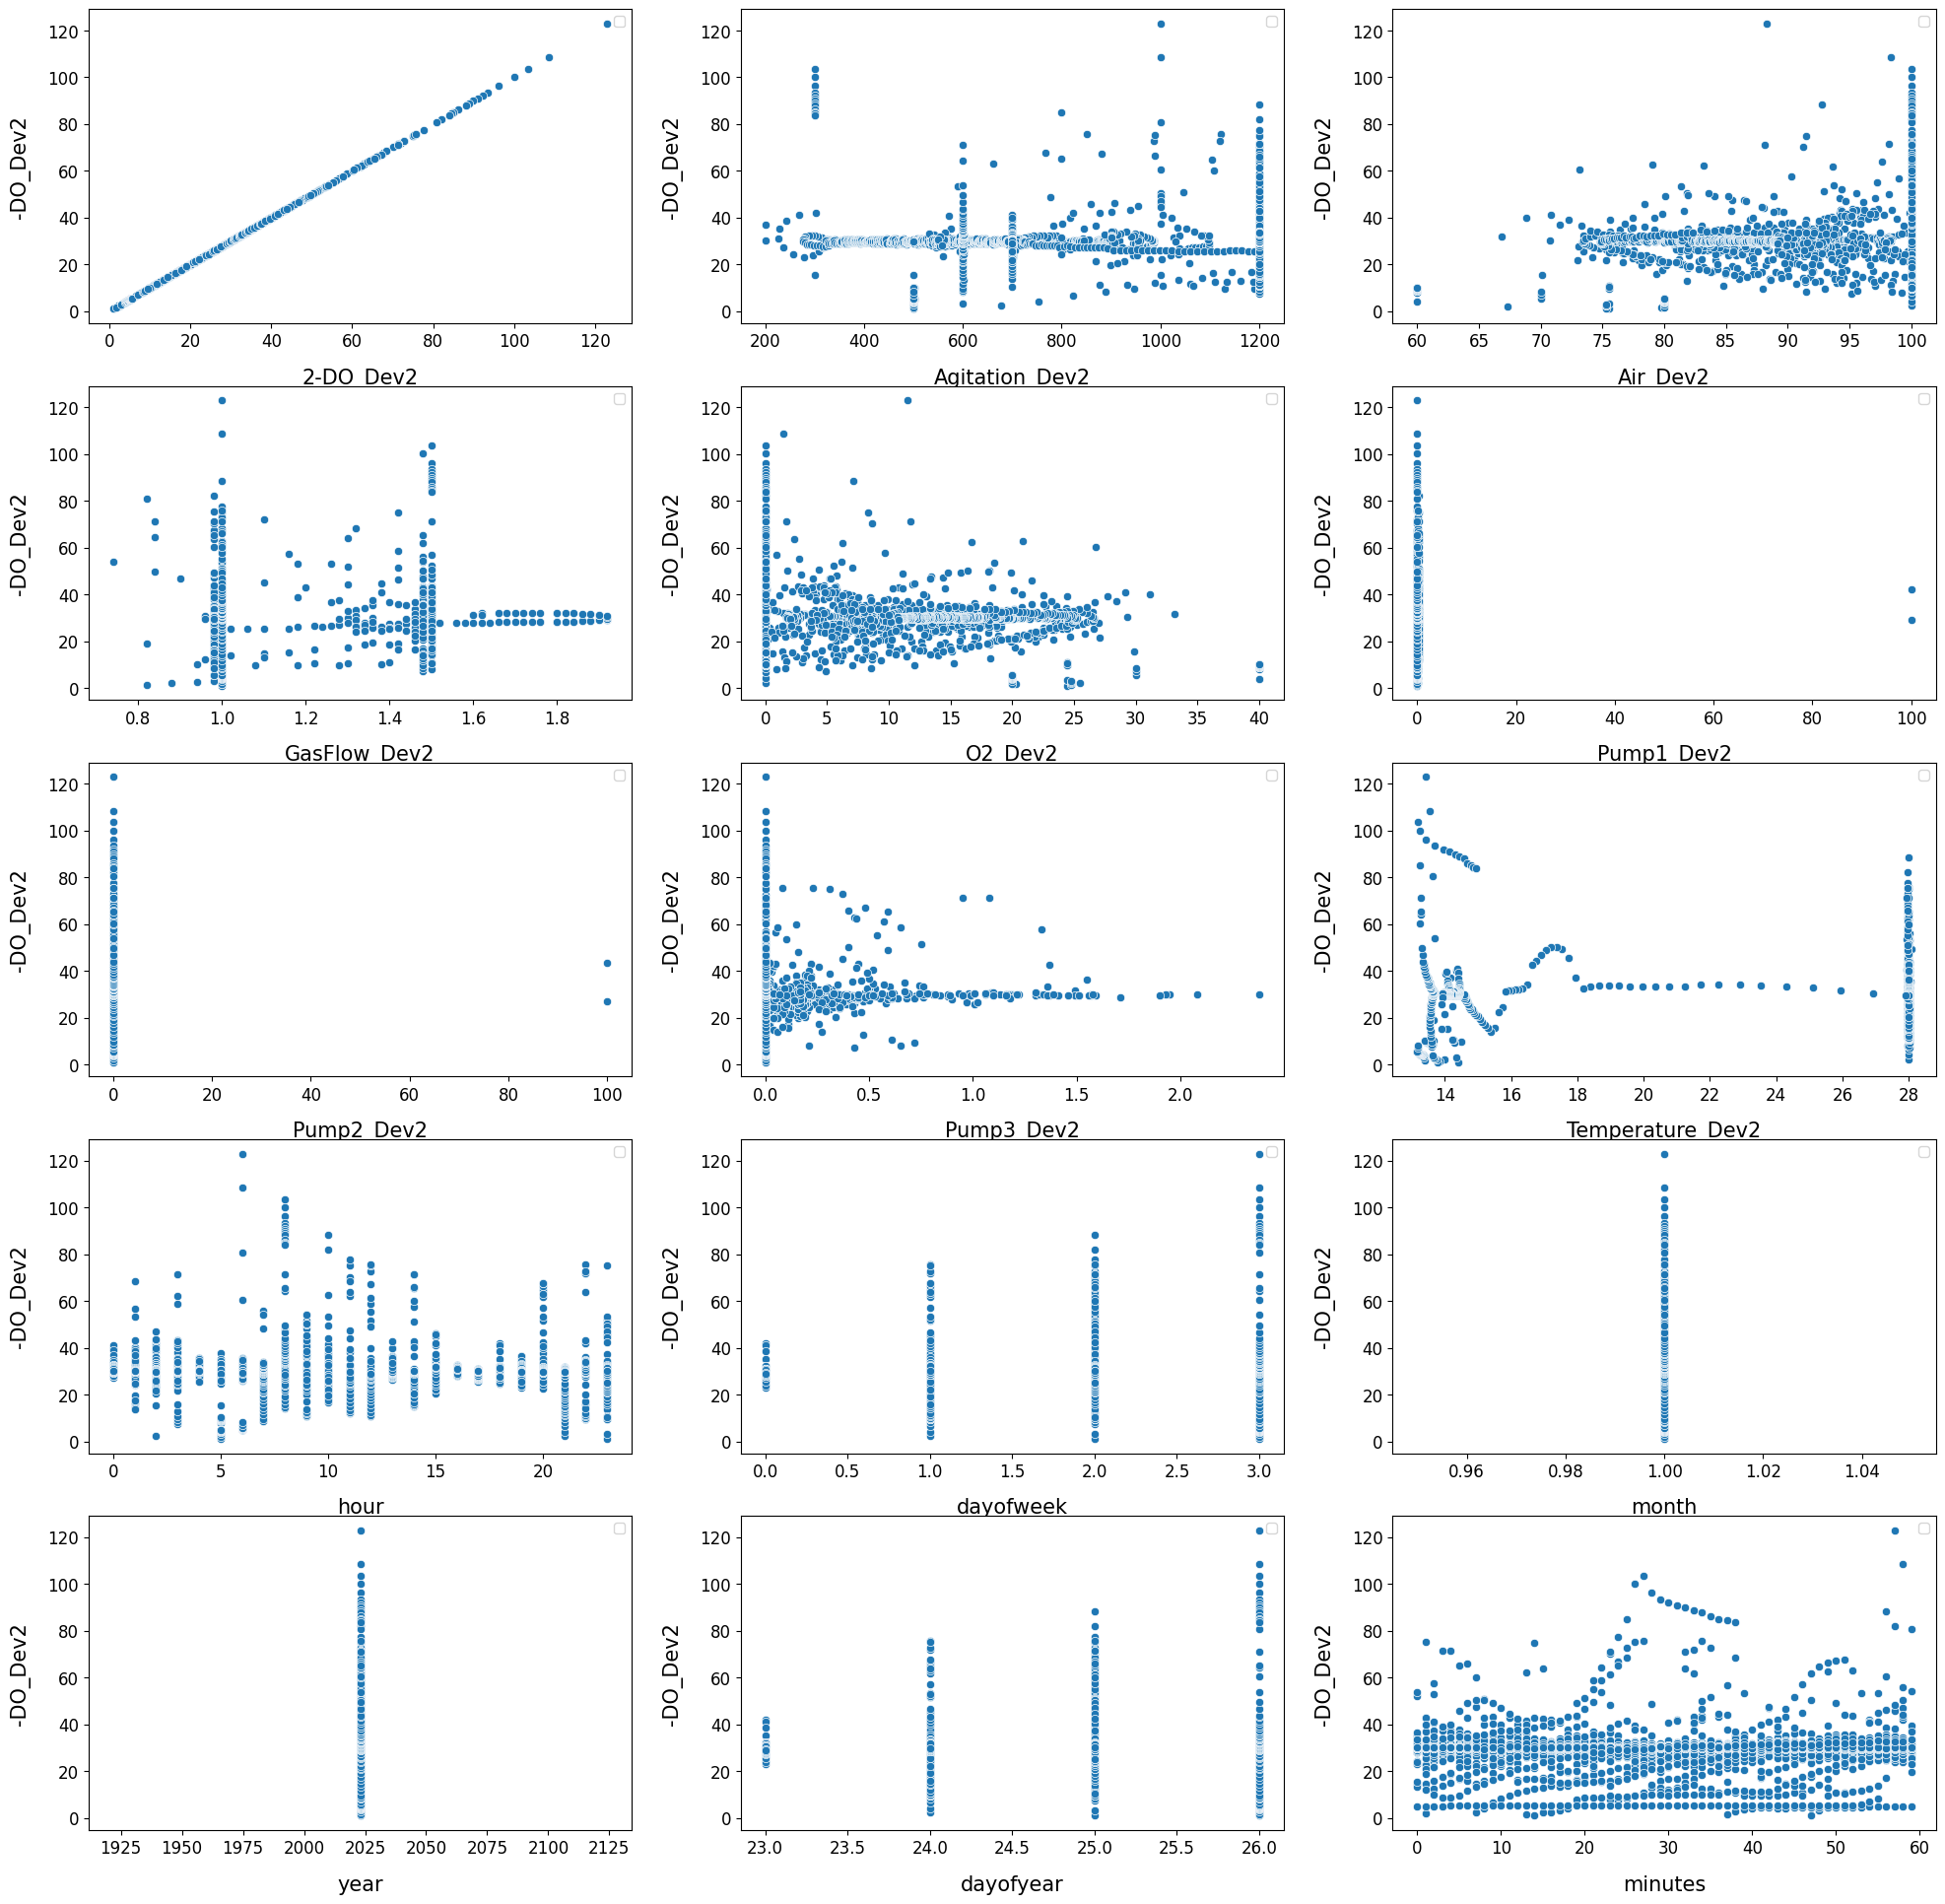

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 30))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(df_experiment1.columns),1):
    plt.subplot(len(list(df_experiment1.columns)), 3, i)
    sns.scatterplot(x=feature, y='2-DO_Dev2', palette='Blues', data=df_experiment1)

    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('-DO_Dev2', size=15, labelpad=12.5)

    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)

    plt.legend(loc='best', prop={'size': 10})

plt.show()


From all features vs target plots we see the corelation between each feature with the target

For the new conclusion we infer that the acording features are not relevant, and therefor we drop them:

1.   year
2.   dayofyear
3.   minutes
4.   hour
5.   dayofweek
6.   mounth
7.   Pump1_Dev2
8.   Pump2_Dev2

  

In [ ]:
df_experiment1=df_experiment1.drop('year', axis = 1)
df_experiment1=df_experiment1.drop('dayofyear', axis = 1)
df_experiment1=df_experiment1.drop('minutes', axis = 1)
df_experiment1=df_experiment1.drop('hour', axis = 1)
df_experiment1=df_experiment1.drop('dayofweek', axis = 1)
df_experiment1=df_experiment1.drop('month', axis = 1)
df_experiment1=df_experiment1.drop('Pump1_Dev2', axis = 1)
df_experiment1=df_experiment1.drop('Pump2_Dev2', axis = 1)
df_experiment1

,2-DO_Dev2,Agitation_Dev2,Air_Dev2,GasFlow_Dev2,O2_Dev2,Pump3_Dev2,Temperature_Dev2
Time Stamp,,,,,,,
2023-01-23 18:54:00,42.01,303.0,100.0,1.0,0.0,0.0,28.00
2023-01-23 18:55:00,41.20,269.0,100.0,1.0,0.0,0.0,28.00
2023-01-23 18:56:00,38.67,243.0,100.0,1.0,0.0,0.0,28.00
2023-01-23 18:57:00,35.23,229.0,100.0,1.0,0.0,0.0,27.99
2023-01-23 18:58:00,31.22,227.0,100.0,1.0,0.0,0.0,28.00
...,...,...,...,...,...,...,...
2023-01-26 08:34:00,88.05,300.0,100.0,1.5,0.0,0.0,14.58
2023-01-26 08:35:00,86.10,300.0,100.0,1.5,0.0,0.0,14.68
2023-01-26 08:36:00,85.04,301.0,100.0,1.5,0.0,0.0,14.79


**train/test split**

In [ ]:
train = df_experiment1.loc[df_TIME < '2023-01-25 19:30:00']
test = df_experiment1.loc[df_TIME >= '2023-01-25 19:30:00']
train_target=train['2-DO_Dev2']
test_target=test['2-DO_Dev2']
train=train.drop('2-DO_Dev2', axis = 1)
test=test.drop('2-DO_Dev2', axis = 1)


In [ ]:
model = SARIMAX(train_target, order=(2,1,2), seasonal_order=((1, 1, 1, 12)))
model_fit = model.fit()
yhat=model_fit.predict(start=test.index[0], end=test.index[-1], exog=test[['Agitation_Dev2', 'Air_Dev2',"GasFlow_Dev2","O2_Dev2","Pump3_Dev2","Temperature_Dev2"]])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


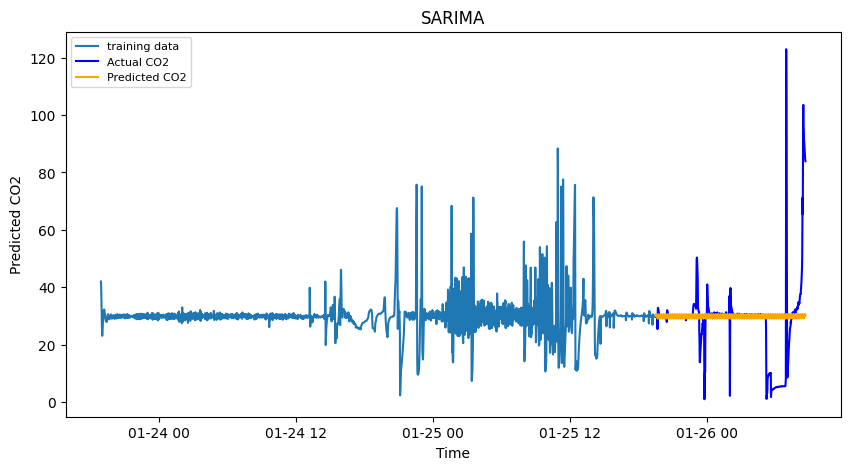

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_target, label='training data')
plt.plot(test_target, color = 'blue', label='Actual CO2')
plt.plot(yhat, color = 'orange',label='Predicted CO2')

plt.title('SARIMA')
plt.xlabel('Time')
plt.ylabel('Predicted CO2')
plt.legend(loc='upper left', fontsize=8)
plt.show()

From the plot of the prediction of SARIMA model on cleaned and normalized data we see that the new model behaves the same as the old one


## Stationary Test

In this section, we test that the data frome behaves as a time series, using adfuller test, because we didn't get the results we expected from the models.

In [ ]:
from statsmodels.tsa.stattools import coint, adfuller


In [ ]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    plt.figure(figsize=(15,5), dpi=100)
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)

    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [ ]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)

    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

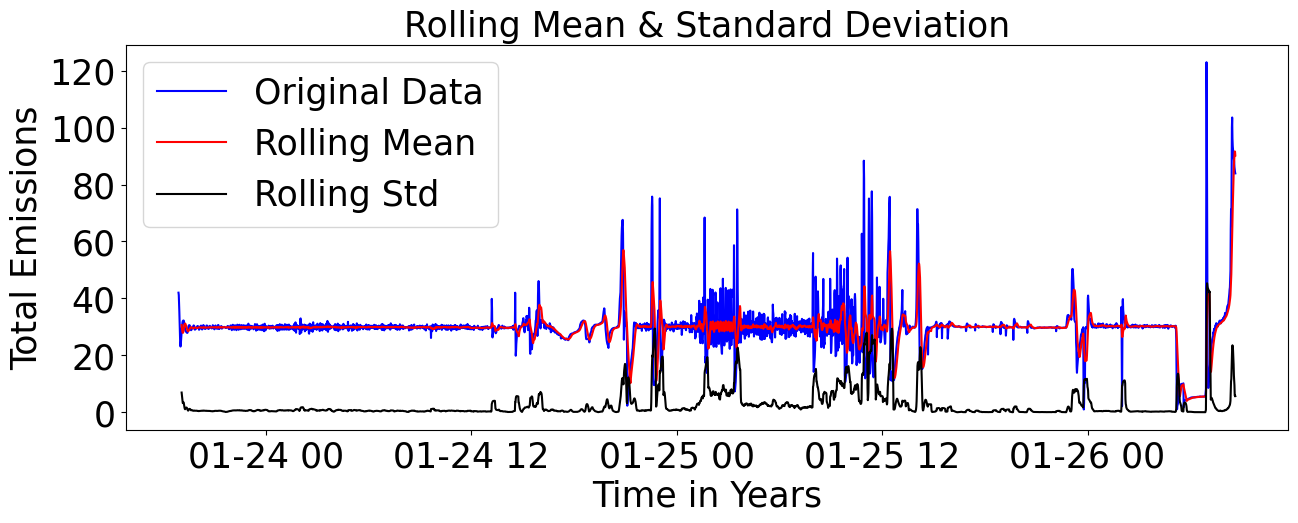

In [ ]:
TestStationaryPlot(df_experiment1['2-DO_Dev2'])

From the graph above, we see that the std is around 0, there for we infer that the data behaves as a time series

## SARIMA ON TREND

In this section, we want to preform a SARIMA test on the trend of the data isolated.

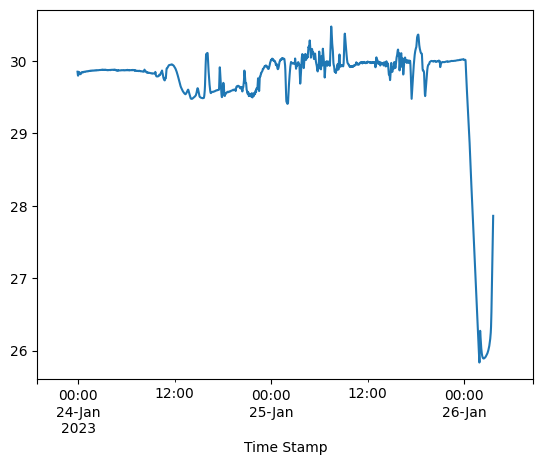

In [ ]:
trend = decomposition.trend
trend.plot()
plt.show()

In [ ]:
model_trend = SARIMAX(
trend, order= (1, 1, 1), seasonal_order=(1, 1, 1, 12))

result_trend = model_trend.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


In [ ]:
trend=pd.DataFrame(trend)

In [ ]:
trend

,trend
Time Stamp,
2023-01-23 18:54:00,NaN
2023-01-23 18:55:00,NaN
2023-01-23 18:56:00,NaN
2023-01-23 18:57:00,NaN
2023-01-23 18:58:00,NaN
...,...
2023-01-26 08:34:00,NaN
2023-01-26 08:35:00,NaN
2023-01-26 08:36:00,NaN


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:

trend_train = trend['trend'].loc[df_TIME < '2023-01-25 19:30:00']
trend_test = trend['trend'].loc[df_TIME >= '2023-01-25 19:30:00']

#X_train, X_test, y_train, y_test = train_test_split(trend, trend['trend'], test_size=0.2, random_state=42)


In [ ]:
#test=test.to_frame()

In [ ]:
#print(test.drop())

In [ ]:
#len(test)

In [ ]:
forecast = result.get_forecast(steps=len(trend_test))
trend_pred = forecast.predicted_mean

In [ ]:
trend_pred

2023-01-25 19:30:00    30.256803
2023-01-25 19:31:00    30.564158
2023-01-25 19:32:00    31.241302
2023-01-25 19:33:00    31.547298
2023-01-25 19:34:00    31.694316
                         ...    
2023-01-26 08:34:00    30.018985
2023-01-26 08:35:00    29.634809
2023-01-26 08:36:00    29.292333
2023-01-26 08:37:00    29.937963
2023-01-26 08:38:00    29.713154
Freq: T, Name: predicted_mean, Length: 789, dtype: float64

In [ ]:
trend_pred=pd.DataFrame(trend_pred)

In [ ]:
trend_test=trend_test.to_frame()

In [ ]:
trend_test

,trend
Time Stamp,
2023-01-25 19:30:00,29.926650
2023-01-25 19:31:00,29.933208
2023-01-25 19:32:00,29.938408
2023-01-25 19:33:00,29.943167
2023-01-25 19:34:00,29.946933
...,...
2023-01-26 08:34:00,NaN
2023-01-26 08:35:00,NaN
2023-01-26 08:36:00,NaN


In [ ]:
trend_pred

,predicted_mean
2023-01-25 19:30:00,30.256803
2023-01-25 19:31:00,30.564158
2023-01-25 19:32:00,31.241302
2023-01-25 19:33:00,31.547298
2023-01-25 19:34:00,31.694316
...,...
2023-01-26 08:34:00,30.018985
2023-01-26 08:35:00,29.634809
2023-01-26 08:36:00,29.292333
2023-01-26 08:37:00,29.937963


In [ ]:
#y_test = y_test.str.replace(',','').astype(float)

In [ ]:
trend_pred = trend_pred.fillna(trend_pred["predicted_mean"].mean())
trend_test = trend_test.fillna(trend_test["trend"].mean())

In [ ]:
trend_pred

,predicted_mean
2023-01-25 19:30:00,30.256803
2023-01-25 19:31:00,30.564158
2023-01-25 19:32:00,31.241302
2023-01-25 19:33:00,31.547298
2023-01-25 19:34:00,31.694316
...,...
2023-01-26 08:34:00,30.018985
2023-01-26 08:35:00,29.634809
2023-01-26 08:36:00,29.292333
2023-01-26 08:37:00,29.937963


In [ ]:
mse = mean_squared_error(trend_pred["predicted_mean"], trend_test["trend"][:len(trend_pred)])
rmse = np.sqrt(mse)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  3.7071833022636116
Root Mean Squared Error:  1.9254047112915278


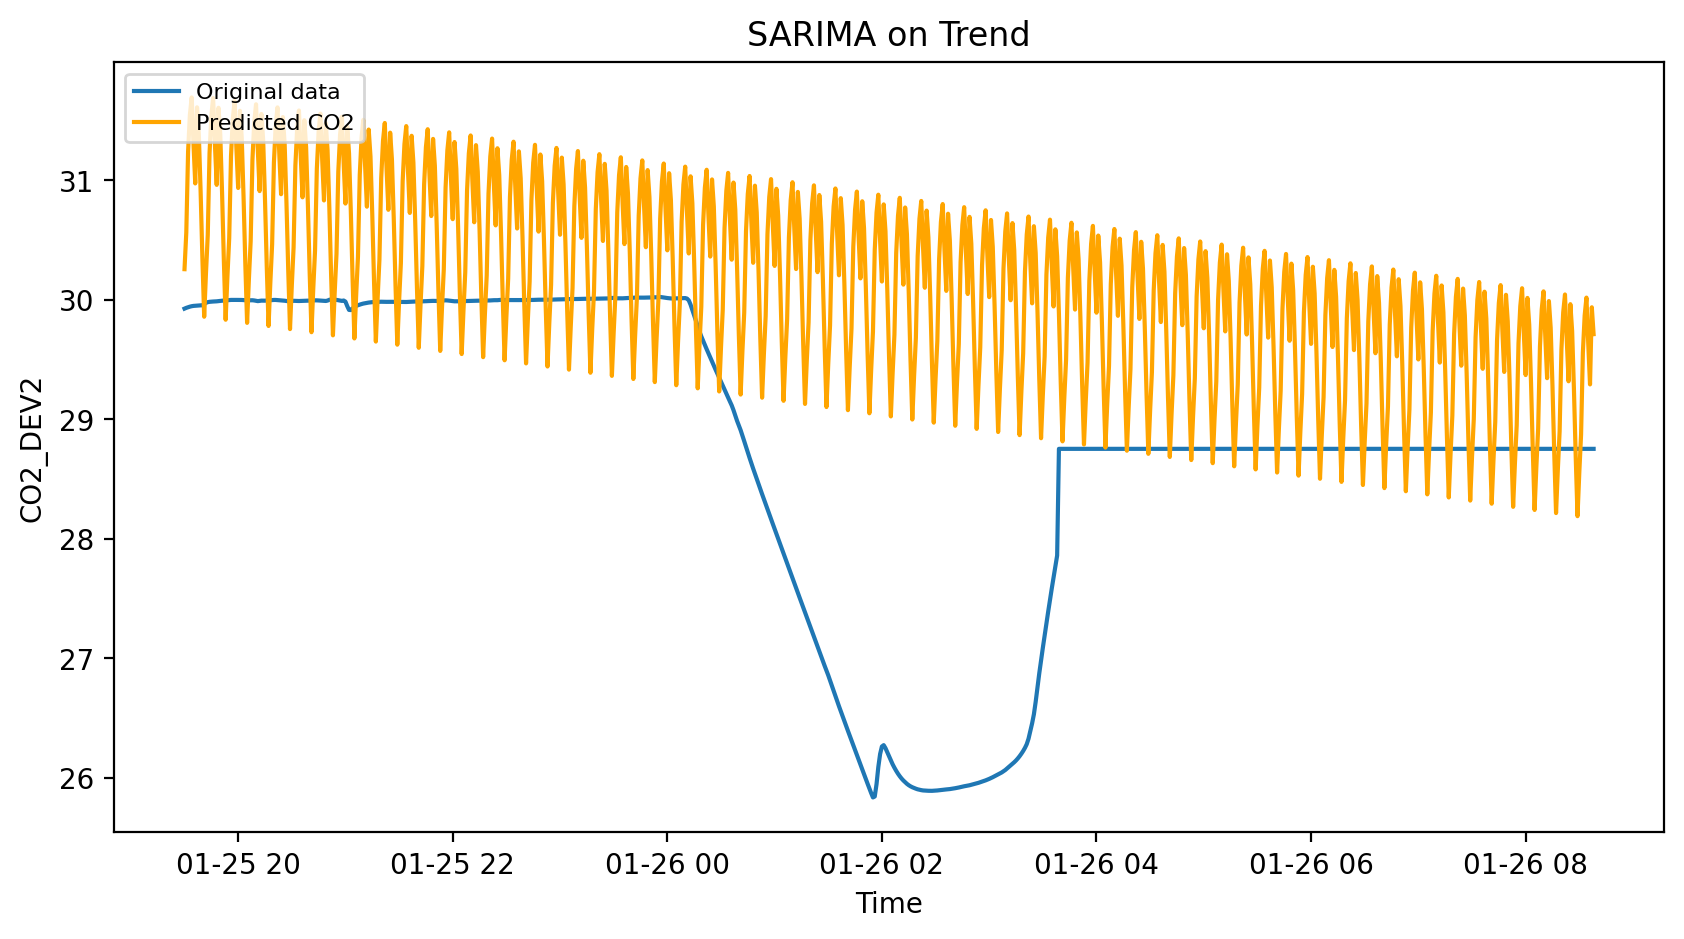

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(trend_test["trend"], label='Original data')
plt.plot(trend_pred, color = 'orange', label='Predicted CO2')
plt.title('SARIMA on Trend')
plt.xlabel('Time')
plt.ylabel('CO2_DEV2')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# **CNN**

A Convolutional Neural Network (CNN) is a type of deep learning model designed specifically for analyzing visual data, such as images. CNNs are widely used in computer vision tasks like image classification, object detection, and image segmentation but can be used for other methods as well.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM

In [ ]:
n_samples = 1000
n_timesteps = 2964
n_features = 6

In [ ]:
df_cnn=df_experiment1.copy()
target=df_cnn["2-DO_Dev2"]
df_cnn=df_cnn.drop('2-DO_Dev2', axis = 1)

In [ ]:
df_cnn

,Agitation_Dev2,Air_Dev2,GasFlow_Dev2,O2_Dev2,Pump3_Dev2,Temperature_Dev2
Time Stamp,,,,,,
2023-01-23 18:54:00,303.0,100.0,1.0,0.0,0.0,28.00
2023-01-23 18:55:00,269.0,100.0,1.0,0.0,0.0,28.00
2023-01-23 18:56:00,243.0,100.0,1.0,0.0,0.0,28.00
2023-01-23 18:57:00,229.0,100.0,1.0,0.0,0.0,27.99
2023-01-23 18:58:00,227.0,100.0,1.0,0.0,0.0,28.00
...,...,...,...,...,...,...
2023-01-26 08:34:00,300.0,100.0,1.5,0.0,0.0,14.58
2023-01-26 08:35:00,300.0,100.0,1.5,0.0,0.0,14.68
2023-01-26 08:36:00,301.0,100.0,1.5,0.0,0.0,14.79


In [ ]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_cnn, target, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2964, 6)

In [ ]:

# Model using CNN
cnn_model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu',  input_shape=(6, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])

In [ ]:
cnn_model.compile(optimizer='adam', loss='mse')
history=cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the models
cnn_predictions = cnn_model.predict(X_test)

cnn_mse = mean_squared_error(y_test, cnn_predictions)

print("MSE (CNN):", cnn_mse)

24/24 [==============================] - 0s 1ms/step
MSE (CNN): 85.42770539193104


In [ ]:
print(len(cnn_predictions))

741


In [ ]:
df_cnn1=pd.DataFrame(cnn_predictions)

In [ ]:
df_cnn1

,0
0,22.134375
1,29.796581
2,30.401196
3,28.961479
4,28.972424
...,...
736,29.989626
737,29.969028
738,28.723509
739,29.875904


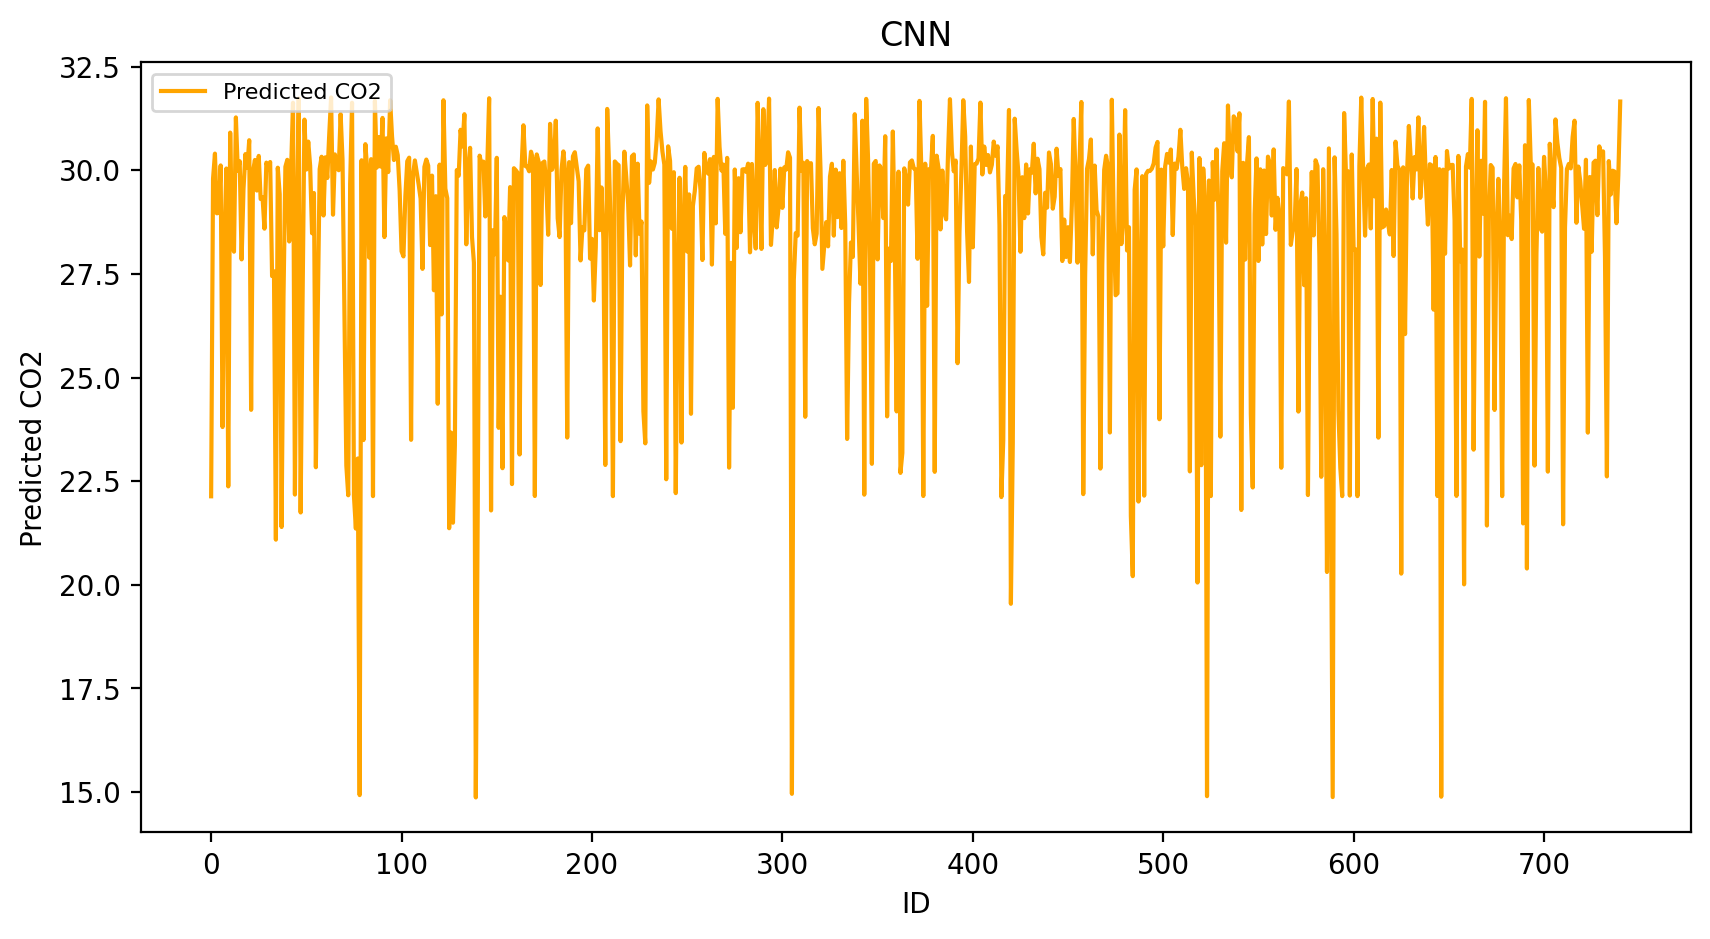

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(df_cnn1, color = 'orange',label='Predicted CO2')

plt.title('CNN')
plt.xlabel('ID')
plt.ylabel('Predicted CO2')
plt.legend(loc='upper left', fontsize=8)
plt.show()



From the graph above we see the behavior of our target prediction using the CNN model, we can see its stable around 30 as we recieved in previous models

# **LSTM**

 Long Short-Term Memory, is a type of recurrent neural network (RNN) architecture. It is designed to address the limitations of traditional RNNs in capturing long-term dependencies in sequential data.

In [ ]:
df_LSTM=df_experiment1.copy()
target_lstm=df_LSTM["2-DO_Dev2"]
df_LSTM=df_LSTM.drop('2-DO_Dev2', axis = 1)

In [ ]:
# Split the data into train and test sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(df_LSTM, target_lstm, test_size=0.2, random_state=42)

In [ ]:
# Model using RNN (LSTM)
rnn_model = Sequential([
    LSTM(32, activation='relu', input_shape=(6,1)),
    Dense(1)
])

In [ ]:

rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=0)

# Evaluate the models
rnn_predictions = rnn_model.predict(X_test)

rnn_mse = mean_squared_error(y_test, rnn_predictions)

print("MSE (RNN):", rnn_mse)

24/24 [==============================] - 0s 2ms/step
MSE (RNN): 52.98253204064202


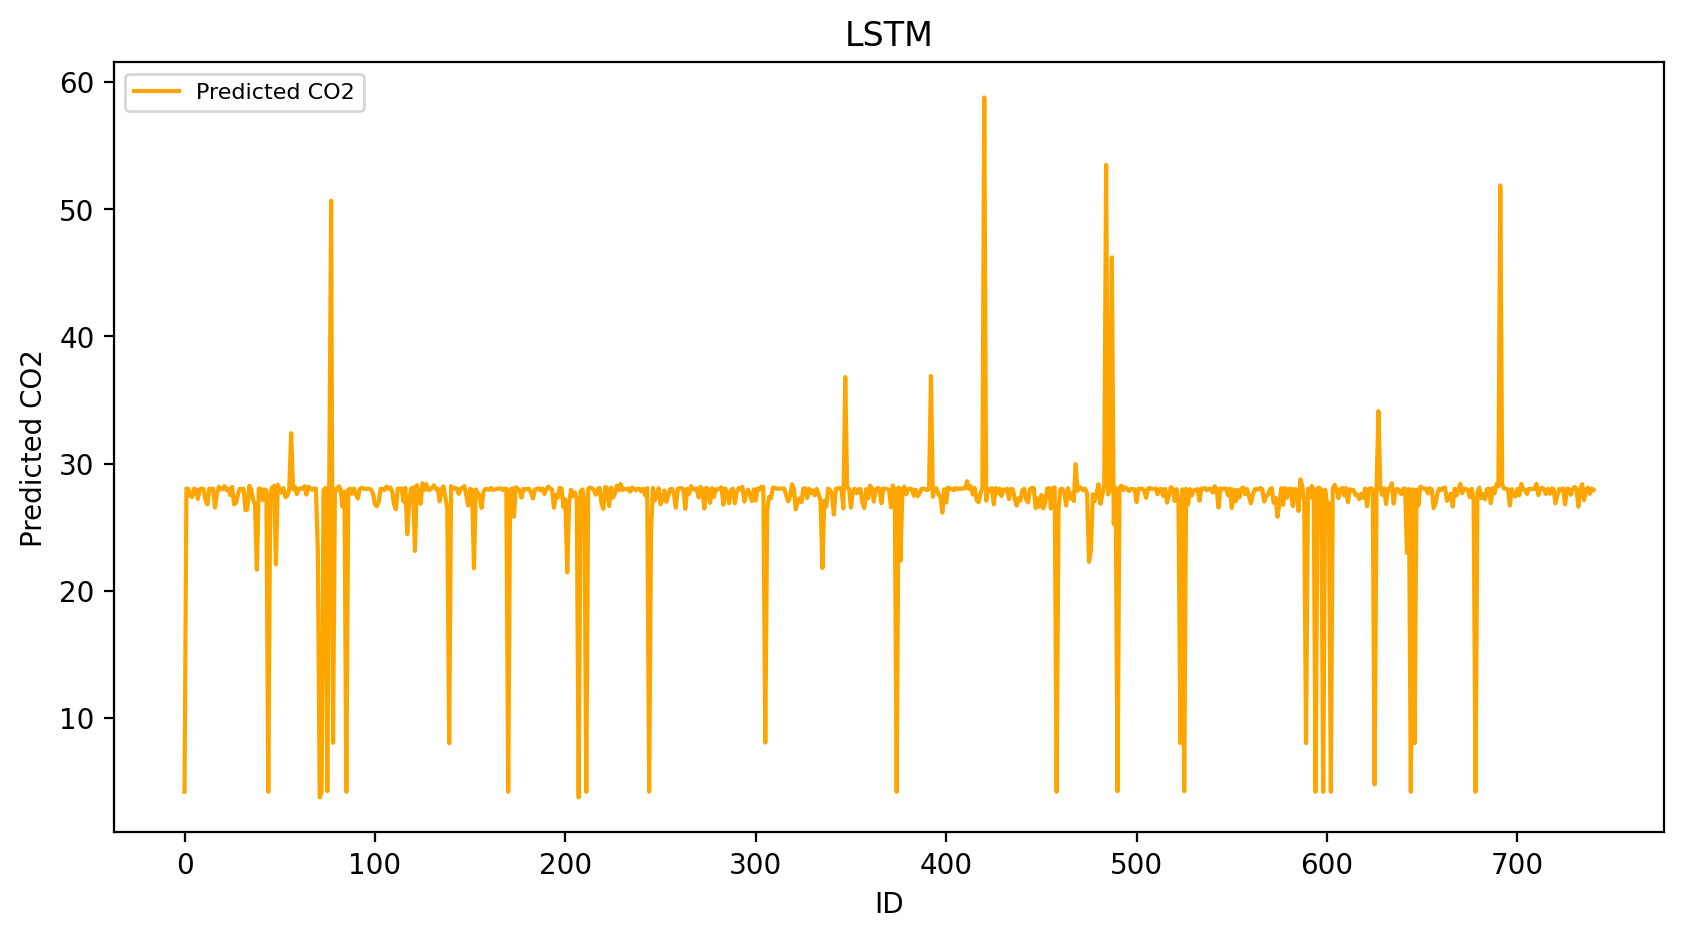

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
#plt.plot(train_target, label='training data')
plt.plot(rnn_predictions, color = 'orange',label='Predicted CO2')

plt.title('LSTM')
plt.xlabel('ID')
plt.ylabel('Predicted CO2')
plt.legend(loc='upper left', fontsize=8)
plt.show()


From the graph above we see the result of the LSTM prediction, we can see it bounce around 30 with better stability than the CNN model but with a grater variance


## LSTM And CNN And Real Results Comparison

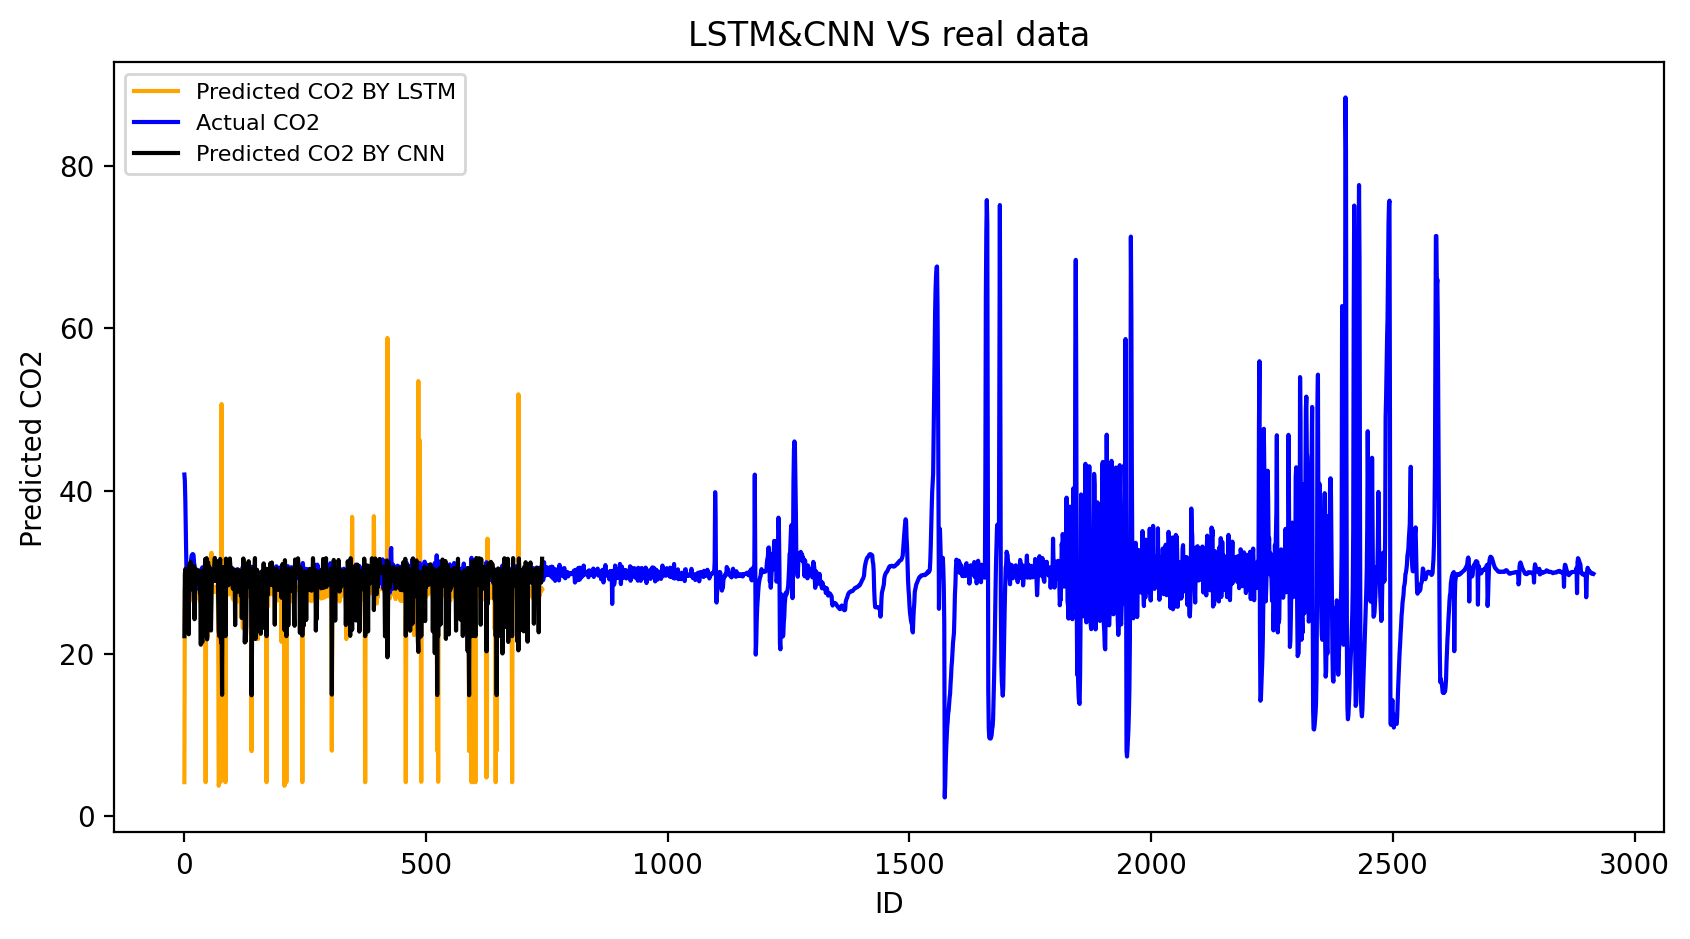

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.title('LSTM&CNN VS real data')
#plt.plot(train_target, label='training data')
plt.plot(rnn_predictions, color = 'orange',label='Predicted CO2 BY LSTM')
plt.plot(np.array(train_target,test_target), color = 'blue', label='Actual CO2')
plt.plot(df_cnn1, color = 'black',label='Predicted CO2 BY CNN')
plt.xlabel('ID')
plt.ylabel('Predicted CO2')
plt.legend(loc='upper left', fontsize=8)
plt.show()




From the graph above we see that the CNN prediction is more similliar to the test values than the LSTM model predictions

#Conclusion

For conclusion, at first we cleaned the data through preproccessing phase which us to reduce the dimension of the data frame and removed unnecessary features then we normalzed the data in order to work on the same range of values for the diffrent features, then we implemented 2 time series models and 2 DL models to predict the DO_DEV2 values, and we looked and fined the most correlated features to it, we visualized the data at each phase with the perediction of each model and investigate its behaviour. we conclude that the data is convege around 30 with a different variance for each model. the best model for our opinion is the SARIMA model over the trend decompose with a MSE of 1.4